## Task #3 Exploratory Data Analysis Retail

### DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION

### Batch: GRIPAUGUST21

#### DATASET : SAMPLESUPERSTORE.CSV (https://bit.ly/3i4rbWl)



### Author : HEMESH

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("SampleSuperstore (1).csv")

In [3]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Here we can see that there are no null values so we can start EDA

In [8]:
df.Country.unique()

array(['United States'], dtype=object)

In [9]:
df.drop(df[["Country"]],axis = 1,inplace=True)

We have dropped country column becuase it has only unique variable which wont be helpful in gaining any insights

In [10]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

##  Exploratory Data Analysis

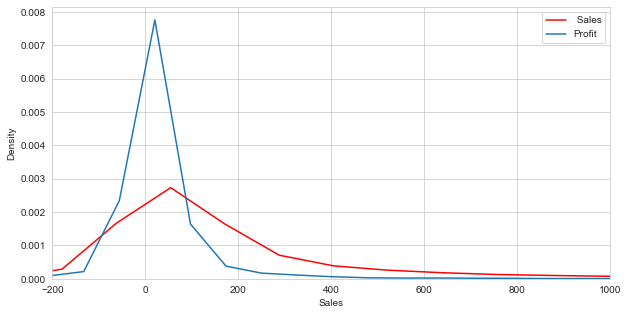

In [11]:
### lets get the idea of distribution of sales and profit

plt.figure(figsize=(10,5))
sns.kdeplot(df.Sales,color="red",label =" Sales")
sns.kdeplot(df.Profit,label= "Profit")
plt.xlim([-200,1000])
plt.legend()

Here we are zooming in between the range of -200 and 1000 becuase thats where the distribution seems to significant this range is found via trail and erorr and analyzig the original kde plot without any x limit.

We can see profit is quite in 0-200 range of sales values, but as sales increasing the distribution decreases and profit goes down



<AxesSubplot:xlabel='Sales'>

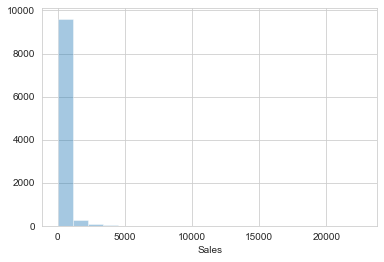

In [12]:
sns.distplot(df.Sales,kde=False,bins=20)

<AxesSubplot:xlabel='Profit'>

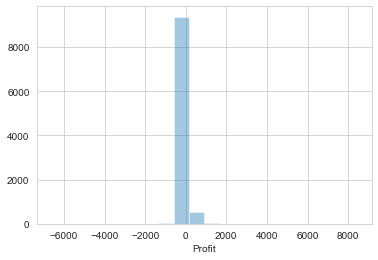

In [13]:
sns.distplot(df.Profit,kde=False,bins=20)

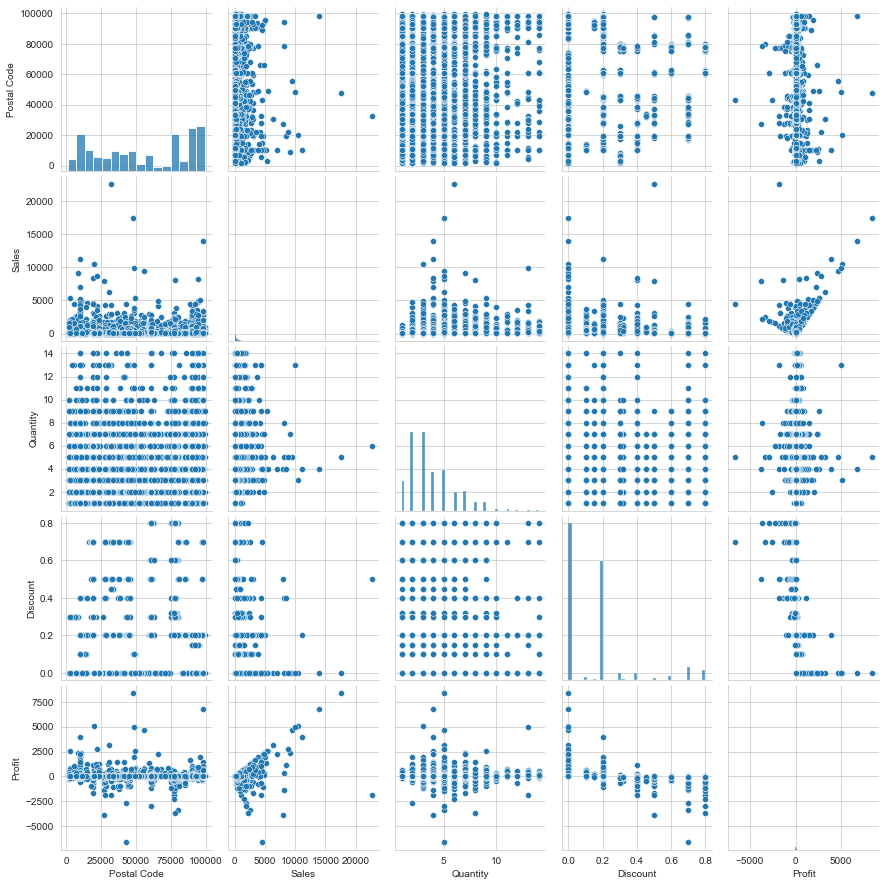

In [14]:
sns.pairplot(df)

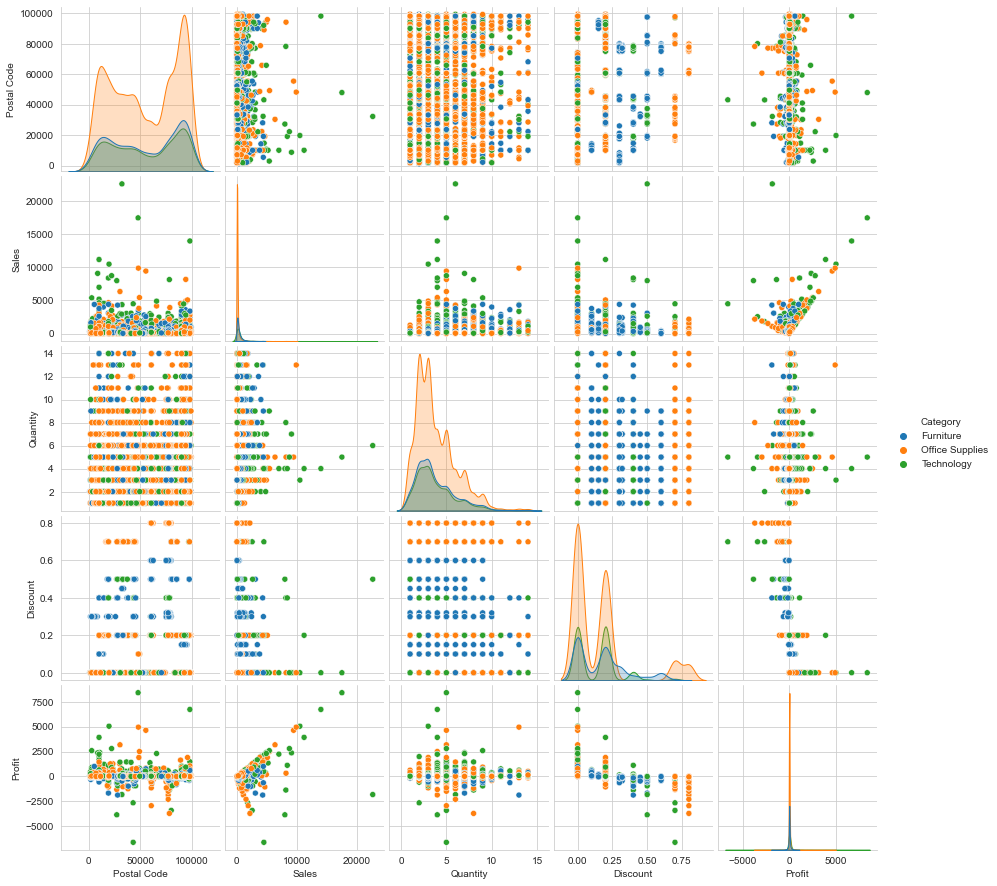

In [15]:
sns.pairplot(df,hue="Category")

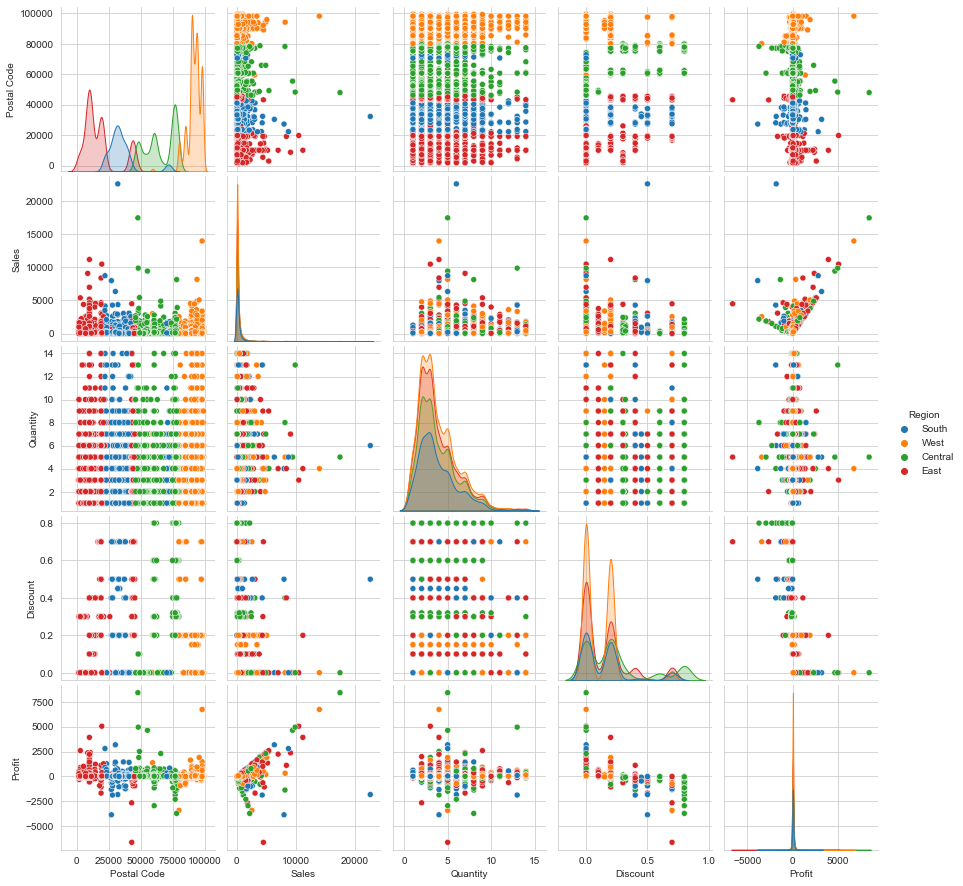

In [16]:
sns.pairplot(df,hue="Region")

Here we can clearly see that in region west sales and profits is better compared to other regions and then comes central and south and north. In some cases we can see there are clearly clusters

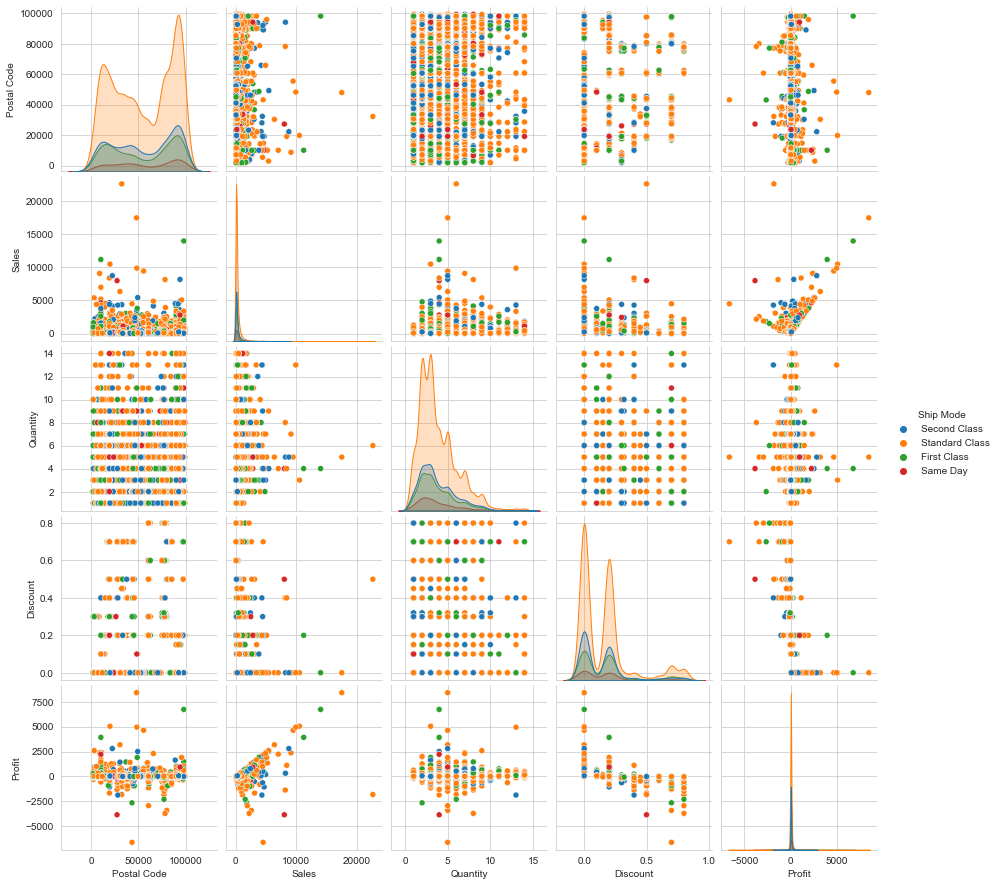

In [17]:
sns.pairplot(df,hue="Ship Mode")

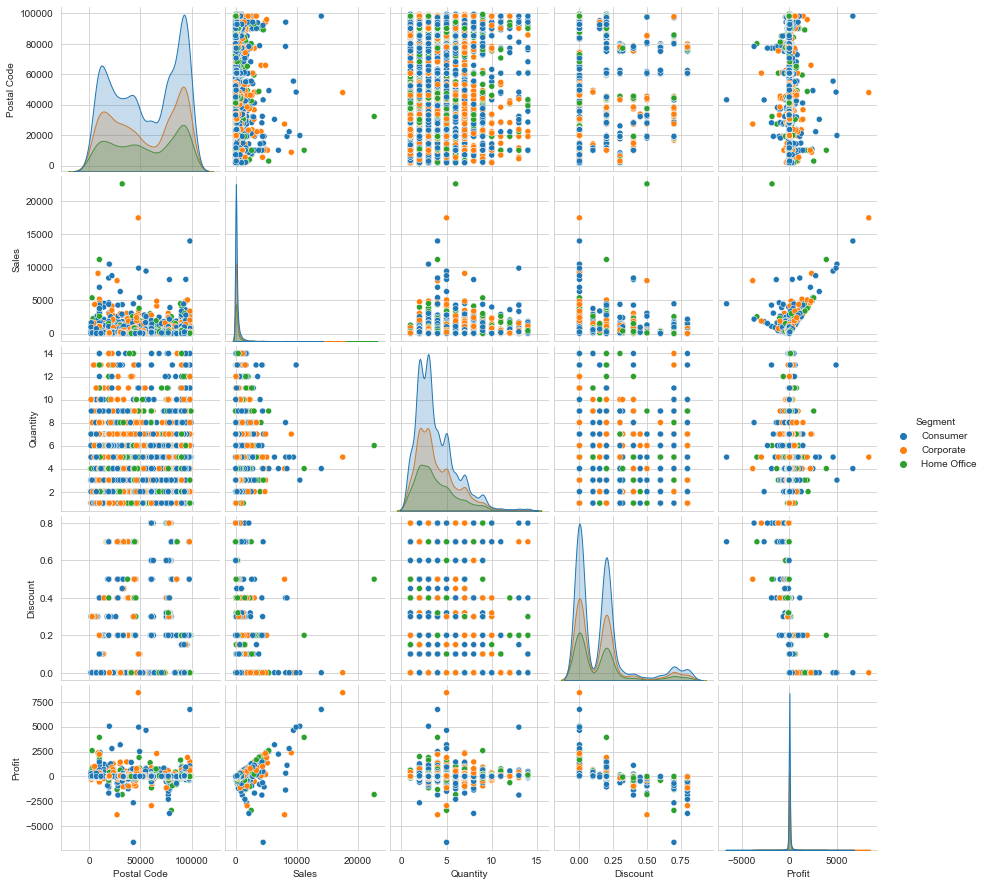

In [18]:
sns.pairplot(df,hue="Segment")

In [19]:
df.corr()

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

<AxesSubplot:>

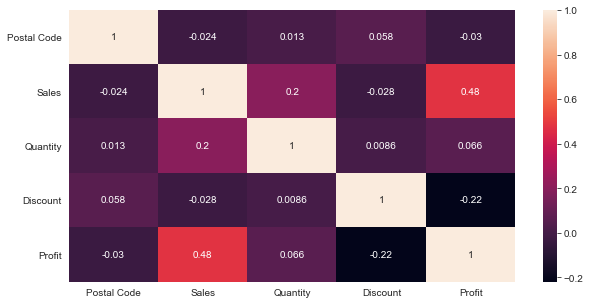

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)


we can observe

- Sales and Profit are Moderately Correlated. 
- Discount and Profit are Negatively Correlated
- Quantity and Profit are less Moderately Correlated.

## Categorical Features


In [21]:
cat_df = df[["Ship Mode","Segment","Region","Category"]]

In [22]:
for i in cat_df:
    print(i)

Ship Mode
Segment
Region
Category


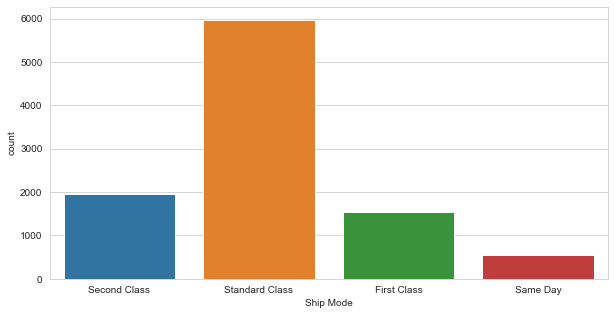

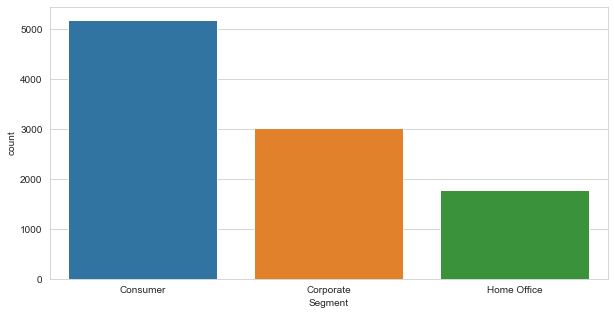

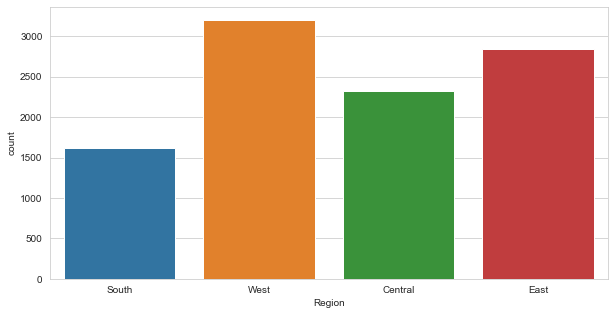

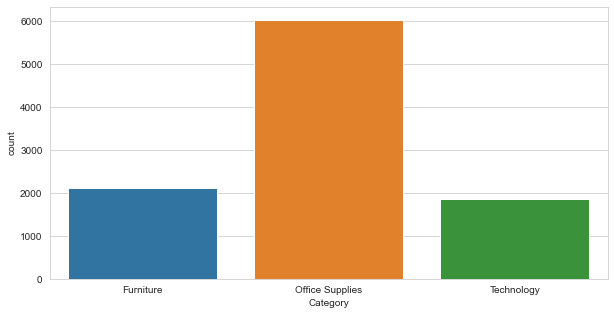

In [23]:
for i in cat_df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(cat_df[i])
    
    

Text(0.5, 1.0, 'Sub-Category')

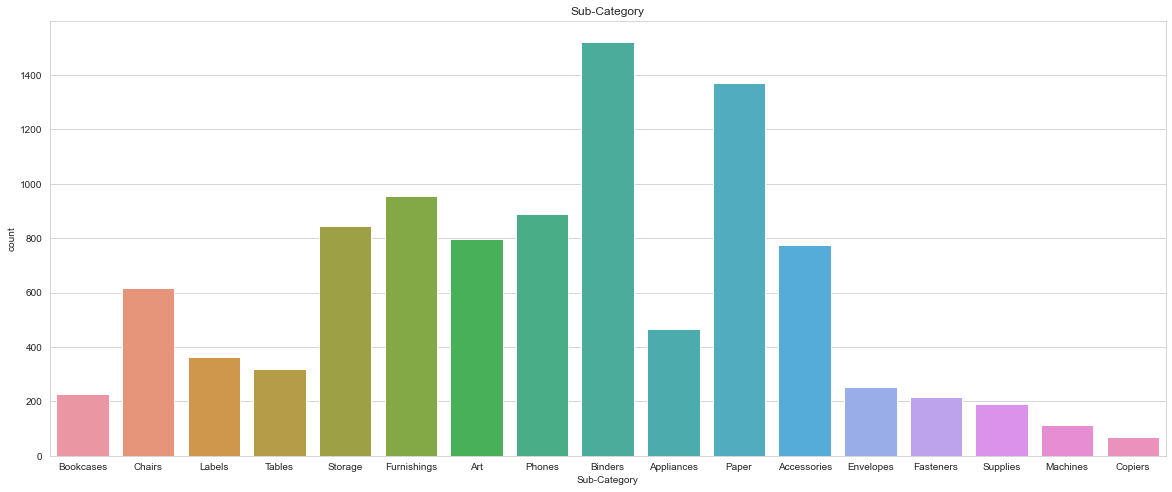

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category')


Text(0.5, 1.0, 'state')

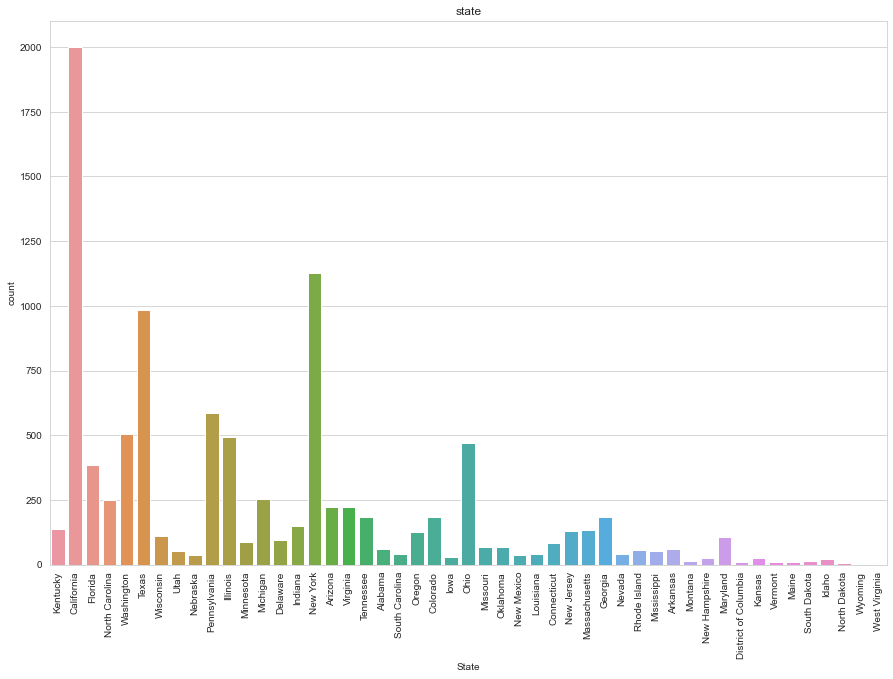

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(df["State"])
plt.xticks(rotation=90)
plt.title("state")


Text(0.5, 1.0, 'Quantity')

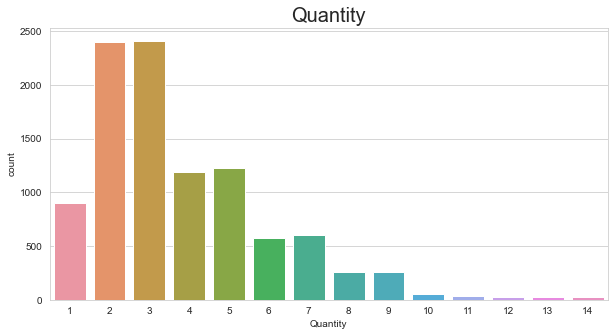

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)


Text(0.5, 1.0, 'Discount')

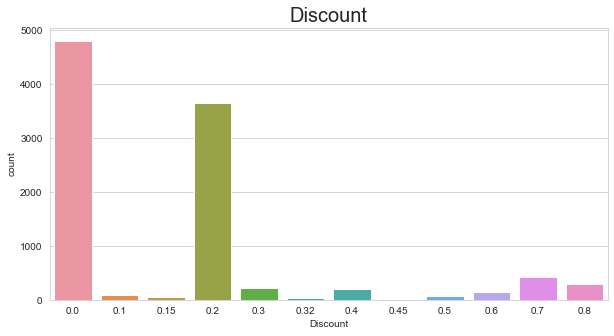

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(df['Discount'])
plt.title('Discount',fontsize=20)


## Numerical Features 

Text(0.5, 1.0, 'Sales Distribution')

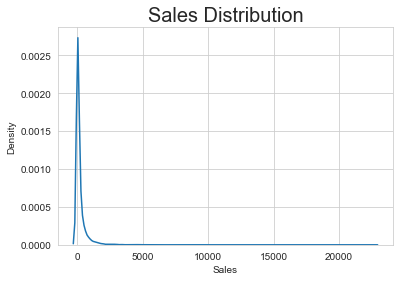

In [28]:
sns.kdeplot(x= df.Sales,data = df)
plt.title("Sales Distribution",fontsize=20)

Text(0.5, 1.0, 'Profit Distribution')

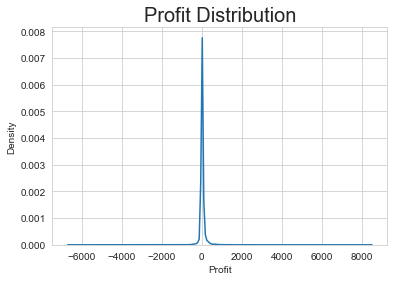

In [29]:
sns.kdeplot(x= "Profit",data = df)
plt.title("Profit Distribution",fontsize=20)

Text(0.5, 1.0, 'Quantity Distribution')

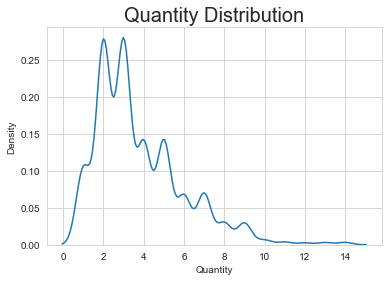

In [30]:
sns.kdeplot(x= df.Quantity,data = df)
plt.title("Quantity Distribution",fontsize=20)

Text(0.5, 1.0, 'Discount Distribution')

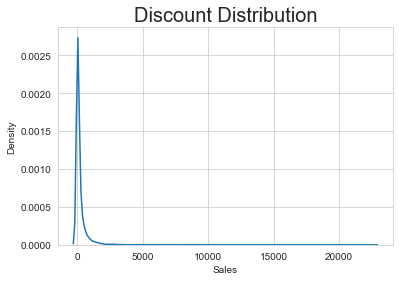

In [31]:
sns.kdeplot(x= df.Sales,data = df)
plt.title("Discount Distribution",fontsize=20)

## State wise analysis

In [32]:
df["State"].unique()


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Text(0.5, 1.0, 'Distribution of no of sales per state')

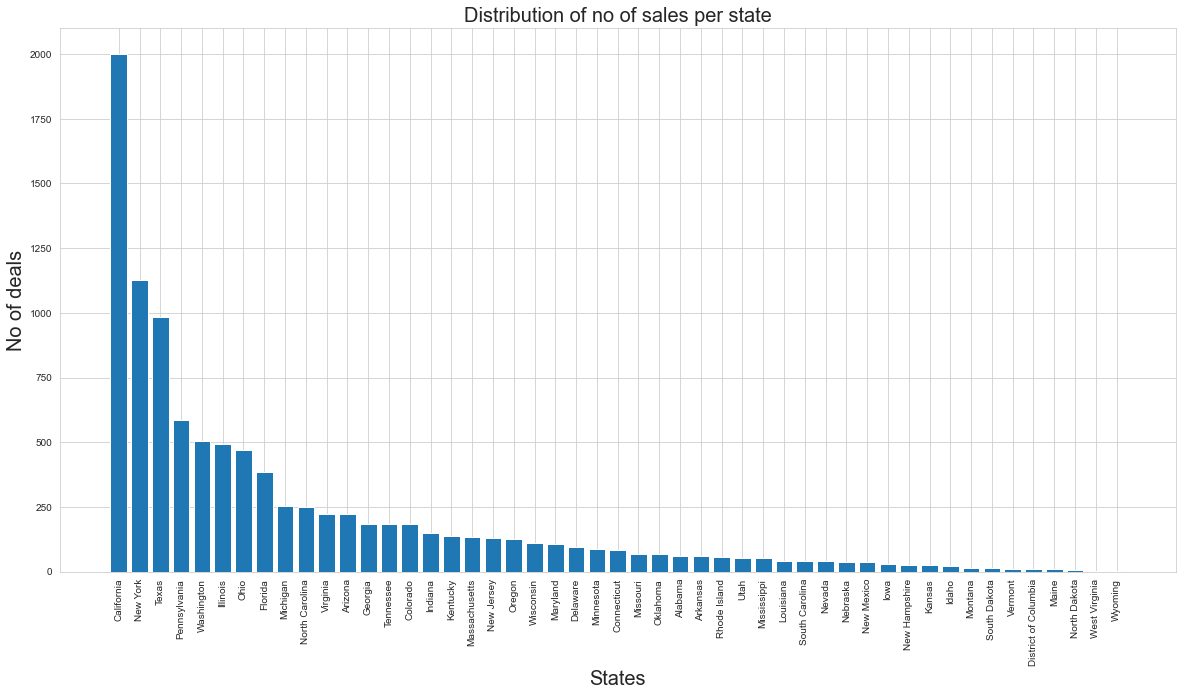

In [70]:
plt.figure(figsize=(20,10))
plt.bar(df1.index,df1.values)
plt.ylabel('No of deals',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.xticks(rotation=90);
plt.title("Distribution of no of sales per state",fontsize=20)

From the above graph we can clearly see the distribution and conclude that top 5 state wise deals are:

1. California
2. New York
3. Texas
4. Pennsylvania
5. Washington

In [36]:
print("The avg no of sales per states is {}".format(df1.mean()))

The avg no of sales per states is 203.9591836734694


## City wise analysis

In [69]:
df2 = df["City"].value_counts()


Text(0.5, 1.0, 'Distribution of no of sales per state')

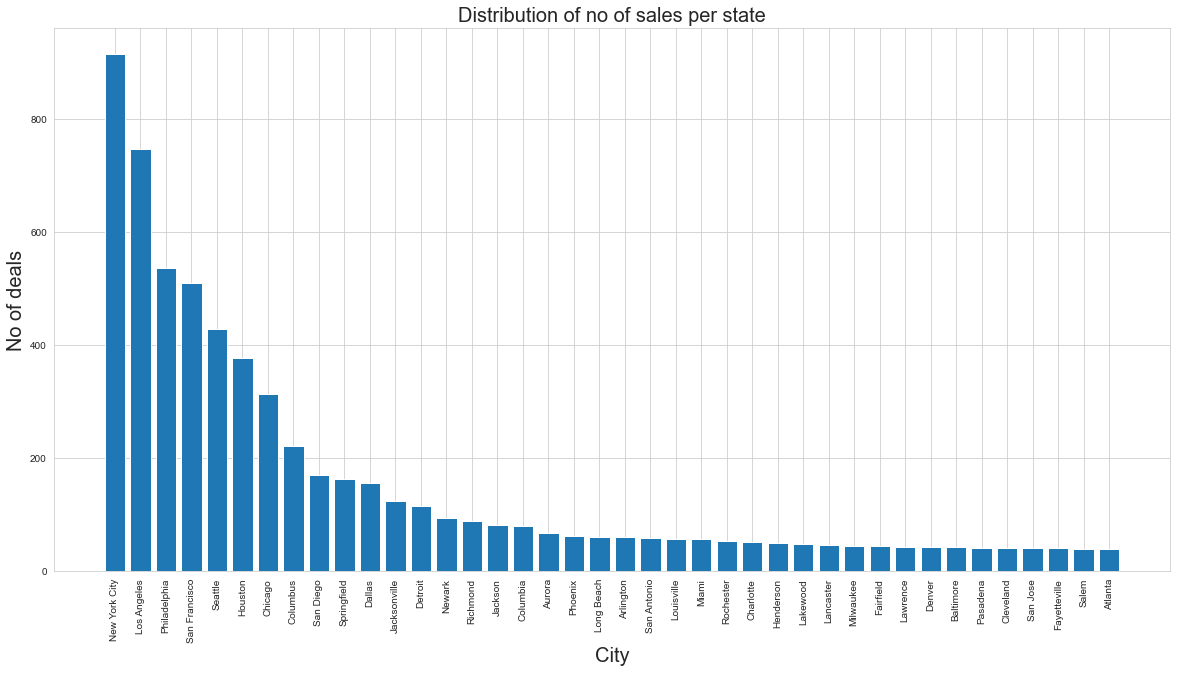

In [38]:
plt.figure(figsize=(20,10))
plt.bar(df2.index,df2.values)
plt.ylabel('No of deals',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.xticks(rotation=90);
plt.title("Distribution of no of sales per state",fontsize=20)

From the above graph we can clearly see the distribution and conclude that top 5 state wise deals are:

1. New York 
2. Los Angeles
3. Philadelphia
4. San Francisco
5. Seattle

In [39]:
print("The avg no of sales per City is {} approx".format(round(df['City'].value_counts().mean())))

The avg no of sales per City is 19 approx


## Now lets analyse how __Sales__,__Profit__,__discount__  varies in state, city , Segment ,Region, Sub-category,Ship Mode,Category,Quantity wise

## Category Wise

In [40]:
dfc =  df.groupby(["Category"])[["Sales","Profit","Discount"]].mean()

dfc

Sales     Profit  Discount
Category                                        
Furniture        349.834887   8.699327  0.173923
Office Supplies  119.324101  20.327050  0.157285
Technology       452.709276  78.752002  0.132323

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

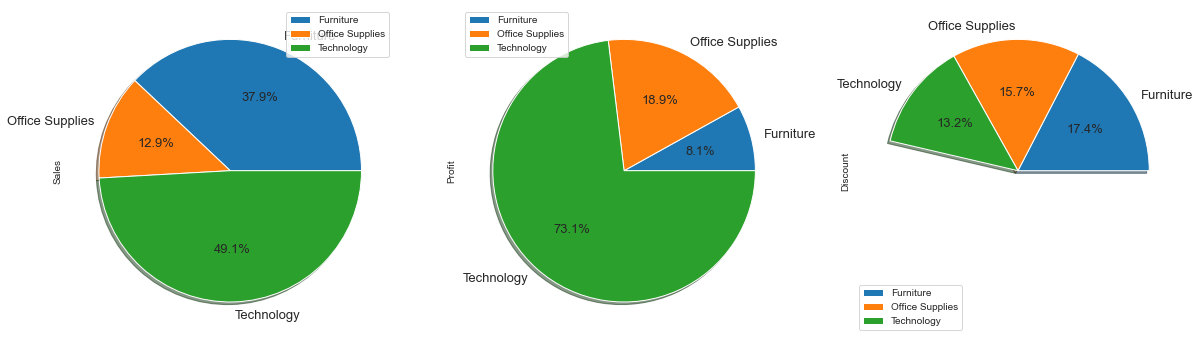

In [41]:
dfc.plot(dfc,kind='pie',subplots=True,autopct= "%1.1f%%",figsize=(20,15),fontsize=13,shadow=True)

We can see that __technology__ has __high sales__ as well as __high profit__ but the problem lies with __Furniture__ despite its __sales being the second largest__ one its __profit__ is quite __less__ due to __high discount__

## Sub-category Wise

In [42]:
dfs = df.groupby(["Sub-Category"])[["Sales","Profit","Discount"]].mean()

In [43]:
dfs

Sales      Profit  Discount
Sub-Category                                   
Accessories    215.974604   54.111788  0.078452
Appliances     230.755710   38.922758  0.166524
Art             34.068834    8.200737  0.074874
Binders        133.560560   19.843574  0.372292
Bookcases      503.859633  -15.230509  0.211140
Chairs         532.332420   43.095894  0.170178
Copiers       2198.941618  817.909190  0.161765
Envelopes       64.867724   27.418019  0.080315
Fasteners       13.936774    4.375660  0.082028
Furnishings     95.825668   13.645918  0.138349
Labels          34.303055   15.236962  0.068681
Machines      1645.553313   29.432669  0.306087
Paper           57.284092   24.856620  0.074891
Phones         371.211534   50.073938  0.154556
Storage        264.590553   25.152277  0.074704
Supplies       245.650200   -6.258418  0.076842
Tables         648.794771  -55.565771  0.261285

In [44]:
dfs.index

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='Sub-Category')

In [46]:
import plotly.express as px

In [47]:
px.bar(dfs, x=dfs.index, y =dfs["Sales"],labels= {"y" : "Sales"})

We can see that __Copiers__ has the __highest__ sales while __Fasteners__ has the __lowest__

In [48]:
px.bar(dfs,x=dfs.index,y=dfs["Profit"],labels= {"y" : "Profit"})

We can see that __Copiers__ has the __highest__ Profit while __Tables__ has the __lowest__

In [49]:
px.bar(dfs,x=dfs.index,y=dfs["Discount"],labels= {"y" : "Discount"})

__Binders__ , __Machines__ and __tables__ have high Discount.

## Segment wise 

In [50]:
df_seg = df.groupby(["Segment"])[["Sales","Profit","Discount"]].mean()
df_seg

Sales     Profit  Discount
Segment                                     
Consumer     223.733644  25.836873  0.158141
Corporate    233.823300  30.456667  0.158228
Home Office  240.972041  33.818664  0.147128

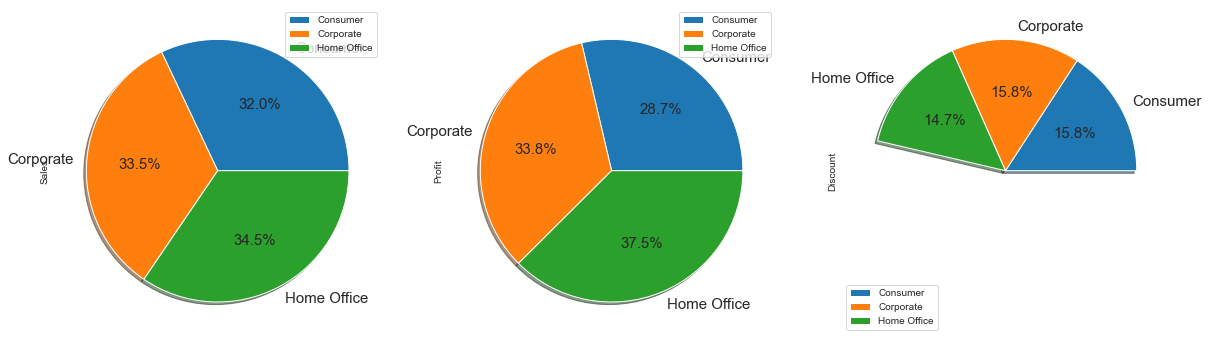

In [51]:
df_seg.plot(df_seg,subplots=True,kind="pie",autopct="%1.1f%%",figsize=(20,15),fontsize=15,shadow=True);

## Region wise 

In [52]:
df_region = df.groupby(["Region"])[["Sales","Profit","Discount"]].mean()
df_region

Sales     Profit  Discount
Region                                  
Central  215.772661  17.092709  0.240353
East     238.336110  32.135808  0.145365
South    241.803645  28.857673  0.147253
West     226.493233  33.849032  0.109335

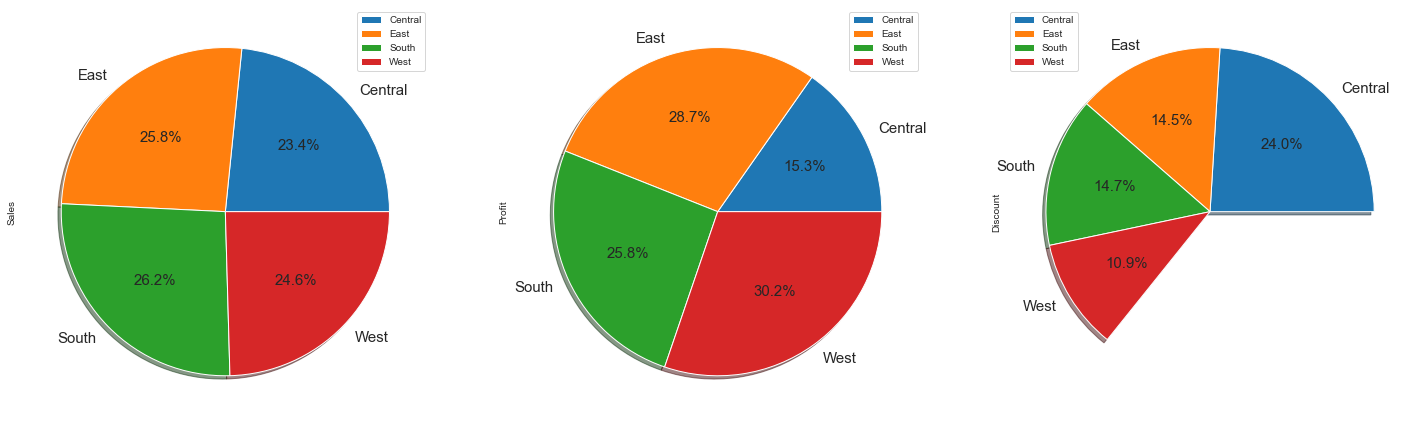

In [53]:
df_region.plot(df_region,autopct="%1.1f%%",kind="pie",subplots=True,figsize=(25,15),fontsize=15,shadow=True);

Here we can see Depsite __sales__ being __high__ in __south__ the profit from __west__ region is better and we can see from diagram that despite __central__ region having a significant amount of __sales__ contribution its __profit__ is less and also the __discount__ is __high__ .

## Ship Mode wise 

In [54]:
df_ship = df.groupby(["Ship Mode"])[["Sales","Profit","Discount"]].mean()
df_ship

Sales     Profit  Discount
Ship Mode                                      
First Class     228.497024  31.839948  0.164610
Same Day        236.396179  29.266591  0.152394
Second Class    236.089239  29.535545  0.138895
Standard Class  227.583067  27.494770  0.160023

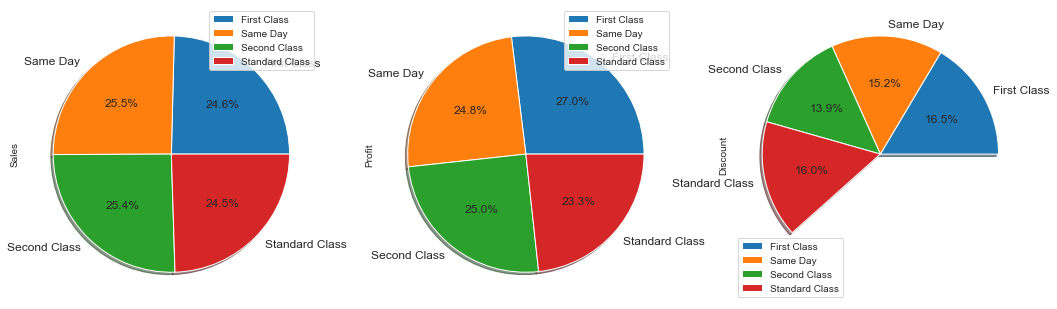

In [55]:
df_ship.plot(df_ship,kind="pie",subplots=True,figsize=(18,10),autopct= "%1.1f%%",fontsize=12,shadow=True);

## State Wise

In [56]:
df_state =  df.groupby("State")[["Sales","Profit","Discount"]].mean()
df_state.head()

Sales     Profit  Discount
State                                      
Alabama     319.846557  94.865989  0.000000
Arizona     157.508933 -15.303235  0.303571
Arkansas    194.635500  66.811452  0.000000
California  228.729451  38.171608  0.072764
Colorado    176.418231 -35.867351  0.316484

In [57]:
px.bar(df_state,x= df_state.index,y=df_state["Sales"],labels= {"y" : "Sales"})

__High__ sales in __Wyoming__ and __low__ sales in __South Dakota__

In [58]:
apx.bar(df_state,x= df_state.index,y=df_state["Profit"],labels= {"y" : "Profit"})

__Highest profit__ in __Vermont__ and __lowest sales__ in __ohio__

In [59]:
px.bar(df_state,x= df_state.index,y=df_state["Discount"],labels= {"y" : "Discount"})

__ILLINOIS__ has the __highest discounts__

## City Wise

In [60]:
df_city = df.groupby(["City"])[["Sales","Profit","Discount"]].mean()
df_city = df_city.sort_values("Profit")
df_city.head()

Sales      Profit  Discount
City                                        
Bethlehem   337.926800 -200.619160  0.380000
Champaign   151.960000 -182.352000  0.600000
Oswego      107.326000 -178.709200  0.600000
Round Rock  693.436114 -169.061614  0.274286
Lancaster   215.031826 -157.371052  0.315217

In [61]:
# Low profit areas
df_h = df_city.head(20)

px.bar(df_h,x=df_h.index,y=df_h["Profit"])

In [62]:
# High profit cities(Top 50)

df_t = df_city.tail(20)

px.bar(df_t,x=df_t.index,y=df_t["Profit"])

__Cities__ in __Bottom 20__ requires more concentration to increase the overall profit

But the overall balance is fine due to high profit cities

## Quantity Wise 

In [63]:
df_q = df.groupby(["Quantity"])[["Sales","Profit","Discount"]].mean()
df_q

Sales      Profit  Discount
Quantity                                   
1           59.234632    8.276396  0.152959
2          120.354488   16.006831  0.154858
3          175.201578   23.667715  0.153329
4          271.764059   37.131310  0.157708
5          337.936339   40.257394  0.157146
6          362.101960   18.051517  0.166556
7          395.888393   56.579163  0.161980
8          458.210802   42.244342  0.171595
9          498.083683   68.557716  0.147946
10         422.046737   35.862404  0.190702
11         463.896529  126.275503  0.097059
12         646.452522   51.524609  0.113043
13        1197.710704  235.144481  0.157407
14         452.826138   93.931166  0.151724

In [64]:
df["Quantity"].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [65]:
px.bar(df_q,x=df_q.index,y = df_q["Profit"])

In [66]:
px.bar(df_q,x=df_q.index,y = df_q["Sales"])

In [67]:
px.bar(df_q,x=df_q.index,y = df_q["Discount"])

__13__ Number of Quantity is high for sales and Profit.

## RESULT AND CONCLUSION

- Profit is more than that of sale but there are some areas where profit could be potentially increased.
- Profit and Discount is high in First Class
- Sales is high for Same day ship
- Sub-category: Copier: High Profit & sales
- Sub-category: Binders , Machines and then tables have high Discount.
- Category: Maximun sales and Profit obtain in Technology.
- Category: Minimun profit obtain in Furniture
- State: Vermont: Highest Profit
- State: Ohio: Lowest Profit
- Segment: Home-office: High Profit & sales
- Here is top 3 city where deals are Highest.
    - New York City
    -  Los Angeles
    -  Philadelphia

- Sales and Profit are Moderately Correlated.
- Quantity and Profit are less Moderately Correlated.
- Discount and Profit are Negatively Correlated
- Here is top 3 state where deals are Highest.
    - Califonia
    -  New York
    -  Texas

- Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)

- Lowest amount of sales= South Dakota(0.8%)
